In [1]:
from pathlib import Path
from pydash import py_
import pandas as pd
import seaborn as sns

In [2]:
DATA_FILE = Path(".") / "data" / "input" / "Alzheimer Disease and Healthy Aging Data In US.csv"
assert DATA_FILE.exists()

---

# Init

In [3]:
source_df = pd.read_csv(DATA_FILE)
source_df.info()
source_df

/var/folders/4y/nhj5hxbx1rv20j_lbtnq65t40000gq/T/ipykernel_93385/4283571709.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  source_df = pd.read_csv(DATA_FILE)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214462 entries, 0 to 214461
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  214462 non-null  int64  
 1   YearEnd                    214462 non-null  int64  
 2   LocationAbbr               214462 non-null  object 
 3   LocationDesc               214462 non-null  object 
 4   Datasource                 214462 non-null  object 
 5   Class                      214462 non-null  object 
 6   Topic                      214462 non-null  object 
 7   Question                   214462 non-null  object 
 8   Data_Value_Unit            214462 non-null  object 
 9   DataValueTypeID            214462 non-null  object 
 10  Data_Value_Type            214462 non-null  object 
 11  Data_Value                 144629 non-null  float64
 12  Data_Value_Alt             144629 non-null  float64
 13  Low_Confidence_Limit       14

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214457,2016,2016,WY,Wyoming,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,"Black, non-Hispanic",POINT (-108.1098304 43.23554134),C01,TOC01,Q08,56,AGE,5064,RACE,BLK
214458,2015,2015,WY,Wyoming,BRFSS,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,%,PRCTG,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C04,TAC01,Q17,56,AGE,65PLUS,RACE,ASN
214459,2017,2017,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,NAA
214460,2016,2016,WY,Wyoming,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,PRCTG,...,NaN,POINT (-108.1098304 43.23554134),C01,TOC06,Q05,56,AGE,5064,OVERALL,OVERALL


---

# Class and YearStart

In [15]:
df = source_df[["Class", "YearStart"]].reset_index(drop=True)

In [17]:
df1 = df.value_counts().rename("count")
df1

Class                                YearStart
Overall Health                       2020         13806
                                     2017         12416
                                     2019         12185
                                     2016         11236
                                     2018         11051
                                     2015         11000
Screenings and Vaccines              2020          9914
Caregiving                           2015          9240
Screenings and Vaccines              2016          9138
                                     2018          9105
Cognitive Decline                    2015          8701
Screenings and Vaccines              2017          6562
                                     2019          6172
                                     2015          5976
Nutrition/Physical Activity/Obesity  2017          5539
                                     2015          5531
                                     2019          5435
C

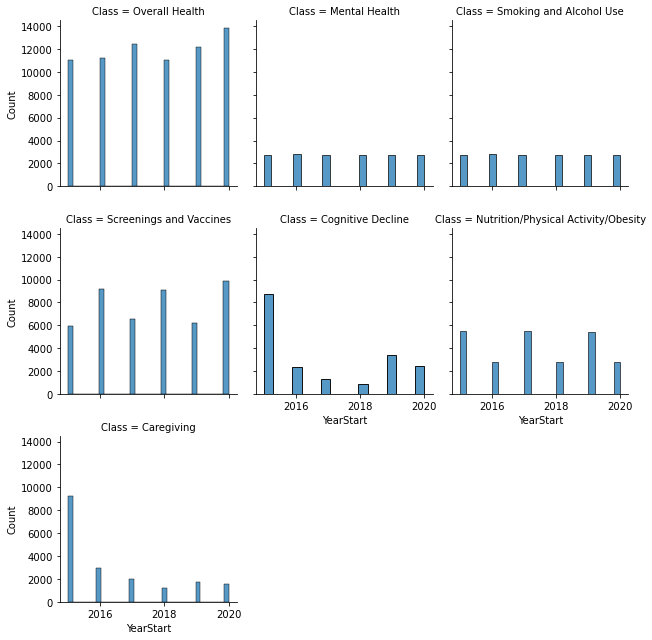

In [19]:
df = source_df[["Class", "YearStart"]].reset_index(drop=False)
g = sns.FacetGrid(df, col="Class", col_wrap=3)
g.map(sns.histplot, "YearStart")

---

# simple count: Periods

In [20]:
df = source_df[["YearStart", "YearEnd"]]
df.value_counts()

YearStart  YearEnd
2020       2020       36006
2015       2015       35020
2019       2019       34354
2016       2016       34145
2017       2017       33429
2018       2018       30548
2015       2020       10960
dtype: int64

---

# simple counts

In [23]:
COLS = ["Datasource", "LocationDesc", "Stratification1"]
for col in COLS:
    df = source_df[col]
    print(f"col: {col}")
    print(df.value_counts())
    print("\n\n")

col: Datasource
BRFSS    214462
Name: Datasource, dtype: int64



col: LocationDesc
United States, DC & Territories    4644
West                               4638
Northeast                          4614
Midwest                            4611
Oregon                             4565
New York                           4557
South                              4542
Utah                               4222
Ohio                               3955
Georgia                            3951
Maryland                           3919
Hawaii                             3907
Tennessee                          3879
Michigan                           3796
Virginia                           3758
Florida                            3753
Maine                              3733
Texas                              3699
Nevada                             3696
District of Columbia               3684
West Virginia                      3682
Mississippi                        3677
Pennsylvania                       3